<a href="https://colab.research.google.com/github/james-lucius/qureca_ADEQUATE/blob/main/M6_511_05_ising_model_coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://gitlab.com/qworld/qeducation/educational-materials/adequate-qbook1/raw/main/qworld/images/adq_1.png" align="left" width=450></a>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\I}{ \mymatrix{rr}{1 & 0 \\ 0 & 1}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\greenbit}[1] {\mathbf{{\color{green}#1}}} $
$ \newcommand{\bluebit}[1] {\mathbf{{\color{blue}#1}}} $
$ \newcommand{\redbit}[1] {\mathbf{{\color{red}#1}}} $
$ \newcommand{\brownbit}[1] {\mathbf{{\color{brown}#1}}} $
$ \newcommand{\blackbit}[1] {\mathbf{{\color{black}#1}}} $

_prepared by Özlem Salehi_

<font size="28px" style="font-size:28px;" align="left"><b>Exercises: Ising Model</b></font>


Run the following cell to perform necessary installations:

In [1]:
try:
  import qiskit, qiskit_aer, qiskit_optimization, networkx
  print("Qiskit has been imported ")
except:
  print("Installing Qiskit...")
  !pip install -U -q qiskit[visualization]
  !pip install -U -q qiskit-aer
  !pip install -U -q qiskit_optimization
  !pip install -U -q networkx
  print("Qiskit has been installed")

Installing Qiskit...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 67.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 646.5/646.5 kB 20.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.6/167.6 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.5/310.5 kB 19.7 MB/s eta 0:00:00
Qiskit has been installed


### Task 1

Given the Ising Model with the following properities, write a function to calculate the energy for different spin assignments and use that function to find the lowest energy state.

- There are 3 spins $s_0, s_1, s_2$.
- $h_0=4, h_1=2, h_2=-6$.
- $J_{0,1}=3, J_{0,2}=-1.3, J_{1,2}=2$

Your function should take as input the values for $s_0,s_1,s_2$ and return the energy.

In [2]:
def calc_energy(s_0,s_1,s_2):
    #your code here
    return (3 * s_0 * s_1) + (-1.3 * s_0 * s_2) + (2 * s_1 * s_2) + (4 * s_0) + (2 * s_1) + (-6 * s_2)

In [3]:
configurations = [[-1,-1,-1],[-1,-1,1],[-1,1,-1],[-1,1,1],[1,-1,-1],[1,-1,1],[1,1,-1],[1,1,1]]

#Your code here
conf_dict = {}
lowest_e = 1000
ground_state = []
for c in configurations:
  e = calc_energy(c[0], c[1], c[2])
  print(f"Ehergy of spin configuration {c}: {e}")
  if e < lowest_e:
    lowest_e = e
    ground_state = c
print(f"Ground state: {ground_state}")
print(f"Lowest energy: {lowest_e}")

Ehergy of spin configuration [-1, -1, -1]: 3.7
Ehergy of spin configuration [-1, -1, 1]: -9.7
Ehergy of spin configuration [-1, 1, -1]: -2.3000000000000007
Ehergy of spin configuration [-1, 1, 1]: -7.7
Ehergy of spin configuration [1, -1, -1]: 8.3
Ehergy of spin configuration [1, -1, 1]: -10.3
Ehergy of spin configuration [1, 1, -1]: 14.3
Ehergy of spin configuration [1, 1, 1]: 3.6999999999999993
Ground state: [1, -1, 1]
Lowest energy: -10.3


### Solution


In [4]:
def calc_energy(s_0,s_1,s_2):
    return 3*s_0*s_1 + -1.3*s_0*s_2 + 2*s_1*s_2 + 4*s_0 + 2*s_1 + -6*s_2

In [5]:
configurations = [[-1,-1,-1], [-1,-1,1],[-1,1,-1], [-1,1,1],[1,-1,-1], [1,-1,1],[1,1,-1], [1,1,1]]

conf_dict = {}
lowest_e = 1000
ground_state = []
for c in configurations:
    e = calc_energy(c[0],c[1],c[2])
    print("Energy for spin configuration",c,": ", e)
    if e < lowest_e:
        lowest_e = e
        ground_state = c
print("Ground state: ", ground_state)
print("Lowest energy: ", lowest_e)

Energy for spin configuration [-1, -1, -1] :  3.7
Energy for spin configuration [-1, -1, 1] :  -9.7
Energy for spin configuration [-1, 1, -1] :  -2.3000000000000007
Energy for spin configuration [-1, 1, 1] :  -7.7
Energy for spin configuration [1, -1, -1] :  8.3
Energy for spin configuration [1, -1, 1] :  -10.3
Energy for spin configuration [1, 1, -1] :  14.3
Energy for spin configuration [1, 1, 1] :  3.6999999999999993
Ground state:  [1, -1, 1]
Lowest energy:  -10.3


### Task 2

For the Max-Cut problem, write a function that takes the number of nodes and the list of edges as input and returns the cost Hamiltonian.

In [6]:
### Your code here
from qiskit.quantum_info import SparsePauliOp

def maxcut_cost_hamiltonian(n, edges):
  # Your code here
  terms = []
  for e in edges:
    term = ["I"] * n
    term[e[0]] = "Z"
    term[e[1]] = "Z"
  H = SparsePauliOp(terms, [1] * len(terms))
  return H


### Solution

The cost Hamiltonian is given as

$$
H_C = \sum_{(i,j) \in E}Z_iZ_j​.
$$

In [7]:
### Your code here
from qiskit.quantum_info import SparsePauliOp

def maxcut_cost_hamiltonian(n, edges):

  terms = []
  for e in edges:
    term = ["I"]*n
    term[e[0]] = "Z"
    term[e[1]] = "Z"
    terms.append("".join(term))
  H = SparsePauliOp(terms, [1]*len(terms))
  return H

### Task 3

Write a function that takes a bit string encoding a Max-Cut problem as input and returns the number of edges in the cut.

In [8]:
def count_edges(bit_string, edges):
  #Your code here
  total = 0
  for edge in edges:
    xi = int(bit_string[edge[0]])
    xj = int(bit_string[edge[1]])
    total += xi + xj - 2 * xi * xj
  return total

### Solution

In [9]:
def count_edges(bit_string, edges):
  total = 0
  for edge in edges:
    xi = int(bit_string[edge[0]])
    xj = int(bit_string[edge[1]])
    total += xi+xj- 2*xi*xj
  return total

### Task 4

Run QAOA setting $p=5$ for the graph given below to solve the Max-Cut problem. Use the functions defined in the previous notebook to create the initial state, mixer and ansatz, and the cost Hamiltonian you have written in Task 6. Complete the functions named `qaoa_circuit` and `expectation_value`. `qaoa_circuit` takes as input the number of nodes, Hamiltonian, number of layers, and parameters, and returns the complete circuit after assigning parameters and transpiling. `expectation_value`returns the expected number of edges in the cut based on the simulation results.

[0, 1, 2, 3, 4]
[(0, 1), (0, 2), (0, 3), (1, 3), (1, 2), (2, 3), (2, 4), (3, 4)]


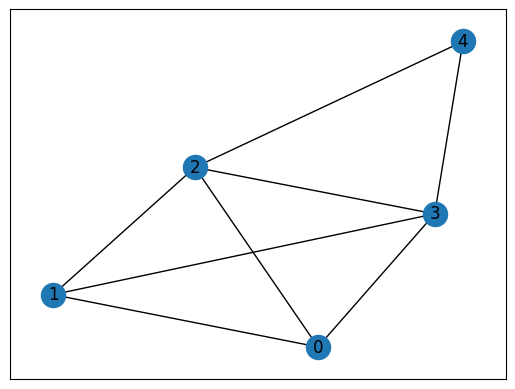

In [10]:
import networkx as nx
G = nx.house_x_graph()
nx.draw_networkx(G)
print(G.nodes)
print(G.edges)

In [11]:
from qiskit import  QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.quantum_info import SparsePauliOp
from qiskit import transpile
from scipy.optimize import minimize
from qiskit_aer import AerSimulator


In [12]:
def initial_state(n):
  qc = QuantumCircuit(n)
  for i in range(n):
    qc.h(i)
  return qc

In [13]:
def mixer(n, i):
  qc = QuantumCircuit(n)
  beta = Parameter(f'beta{i}')
  for i in range(n):
    qc.rx(2*beta,i)
  return qc

In [14]:
def cost(n, op, i):
  qc = QuantumCircuit(n)
  gamma = Parameter(f"gamma{i}")
  for term in op:
    indices = [i for i, p in enumerate(term.paulis[0]) if str(p) != "I"]
    if len(indices) == 2:
      qc.rzz(2*term.coeffs[0].real*gamma, *indices)
    elif len(indices) == 1:
      qc.rz(2*term.coeffs[0].real*gamma, *indices)
  return qc

In [15]:
def qaoa_circuit(n, H, p, params):
  #Your code here
  qc = QuantumCircuit(n, n)
  qc.append(initial_state(n), range(n))
  for i in range(p):
    qc.append(mixer(n, i), range(n))
    qc.append(cost(n, H, i), range(n))
  for i in range(n):
      qc.measure(i, i)
  bc = qc.assign_parameters(params)
  bc = transpile(bc, basis_gates = ['u', 'cx'])
  return bc

In [16]:
def expectation_value(params):
  # Your code here
  n = 5
  p = 10
  H = maxcut_cost_hamiltonian(n, G.edges)
  qc = qaoa_circuit(n, H, p, params)
  shots = 10000
  job = AerSimulator().run(qc, shots = shots)
  counts = job.result().get_counts(qc)
  e = 0
  for bit_string, occurence in counts.items():
    e += - (count_edges(bit_string, G.edges()) *occurence)
  return e/shots


In [17]:
p = 10
params = [1]*p*2
e = expectation_value(params)
print("Initial expectation value estimation:", e)
result = minimize(expectation_value, params, method='COBYLA')
print("Optimized parameters:", result.x)
print("Expectation value at optimized parameters:", expectation_value(result.x))


Initial expectation value estimation: -3.9919
Optimized parameters: [2.03335236 1.03948048 0.93776353 1.00589971 1.03089135 1.98421303
 1.21424246 1.0841874  0.92190164 1.05601839 1.06070965 1.08049769
 1.07232037 0.95068596 1.20519107 0.99099505 1.03001299 1.15876618
 0.96249687 0.92798994]
Expectation value at optimized parameters: -5.7019


### Solution

In [18]:
def qaoa_circuit(n, H, p, params):
  qc = QuantumCircuit(n,n)
  qc.append(initial_state(n), range(n))
  for i in range(p):
    qc.append(mixer(n, i), range(n))
    qc.append(cost(n,H, i), range(n))
  for i in range(n):
    qc.measure(i,i)
  bc = qc.assign_parameters(params)
  bc = transpile(bc, basis_gates=['u', 'cx'])
  return bc

In [19]:
def expectation_value(params):
  n = 5
  p = 10
  H = maxcut_cost_hamiltonian(n, G.edges)
  qc = qaoa_circuit(n, H, p, params)
  shots = 10000
  job = AerSimulator().run(qc,shots=shots)
  counts = job.result().get_counts(qc)
  e = 0
  for bit_string, occurence in counts.items():
      e += - (count_edges(bit_string, G.edges())*occurence)
  return e/shots


In [20]:
p = 10
params = [1]*p*2
e = expectation_value(params)
print("Initial expectation value estimation:", e)
result = minimize(expectation_value, params, method='COBYLA')
print("Optimized parameters:", result.x)
print("Expectation value at optimized parameters:", expectation_value(result.x))


Initial expectation value estimation: -4.0064
Optimized parameters: [2.00572404 1.06558135 1.04699207 1.06879571 1.02757867 1.90406294
 1.35198908 1.14243737 0.84865632 0.96744326 0.95132591 0.9693431
 0.9563428  1.03305696 1.0449123  1.04253801 1.12238537 1.03694538
 1.09670792 1.00196269]
Expectation value at optimized parameters: -5.663


### Task 5

For the optimal parameters you have obtained in Task 4, create the QAOA circuit and run it using Aer simulator. Use the most frequently obtained bitstring to determine the number of edges in the cut.

### Solution

In [21]:
n = 5
H = maxcut_cost_hamiltonian(n, G.edges)
qc = qaoa_circuit(n, H, 10, result.x)
job = AerSimulator().run(qc,shots=1000)
counts = job.result().get_counts(qc)

Let us check which bitstring occurred the most.

In [22]:
print(counts)

{'11101': 1, '00100': 1, '11000': 9, '11110': 1, '10000': 6, '00010': 2, '01111': 4, '01100': 5, '01011': 8, '01010': 6, '10100': 11, '01101': 14, '00000': 2, '11001': 392, '00011': 7, '00111': 10, '01000': 3, '00110': 356, '10011': 16, '01110': 30, '10110': 25, '10111': 4, '10101': 9, '11100': 9, '10010': 11, '01001': 19, '10001': 21, '00101': 5, '11010': 13}


We see that "11001" and "00110" occurred the most. They actually correspond to the same solution, up to the naming of the groups. Let's pick "00110".

In [23]:
print("Number of edges in the cut at optimized parameters:", count_edges("00110", G.edges()) )

Number of edges in the cut at optimized parameters: 6
